In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
def PBIL(iterations, genome_length, population_size, evaluation_function, p1, p2, p3):
    
    log_populations = np.empty((iterations, population_size, genome_length))
    log_fitness = np.empty((iterations, population_size))
    log_probs = np.empty((iterations, genome_length))
    
    probs = np.full(genome_length, 0.5)
    population = np.random.random((population_size, genome_length)) < probs
    population_evaluation = evaluation_function(population)
    
    for i in xrange(iterations):
        x = population[population_evaluation.argmax()]
        probs = probs*(1 - p1) + x*p1
        
        rc = np.random.random(genome_length) < p2
        pp3 = (np.random.random(genome_length) < 0.5) * p3
        probs[rc] = probs[rc]*(1 - p3) + pp3[rc]
        
        population = np.random.random((population_size, genome_length)) < probs
        population_evaluation = evaluation_function(population)
        
        log_populations[i, :, :] = population[:, :]
        log_fitness[i, :] = population_evaluation[:]
        log_probs[i, :] = probs[:]
        
    return log_populations, log_fitness, log_probs
        

In [5]:
def CGA(iterations, genome_length, evaluation_function, learning_rate):
    
    log_populations = np.empty((iterations, 2, genome_length))
    log_fitness = np.empty((iterations, 2))
    log_probs = np.empty((iterations, genome_length))
    
    probs = np.full(genome_length, 0.5)
    population = np.random.random((2, genome_length)) < probs
    population_evaluation = evaluation_function(population)
    
    if (population_evaluation[0] < population_evaluation[1]):
        population = population[::-1, :]
        population_evaluation = population_evaluation[::-1]
    
    for i in xrange(iterations):
        probs[population[0] & (~population[1])] += learning_rate
        probs[(~population[0]) & population[1]] -= learning_rate
        
        population = np.random.random((2, genome_length)) < probs
        population_evaluation = evaluation_function(population)
        
        if (population_evaluation[0] < population_evaluation[1]):
            population = population[::-1, :]
            population_evaluation = population_evaluation[::-1]
        
        log_populations[i, :, :] = population[:, :]
        log_fitness[i, :] = population_evaluation[:]
        log_probs[i, :] = probs[:]
    
    return log_populations, log_fitness, log_probs

In [3]:
def UMDA(iterations, genome_length, population_size, elite_size, evaluation_function):
    
    log_populations = np.empty((iterations, population_size, genome_length))
    log_fitness = np.empty((iterations, population_size))
    log_probs = np.empty((iterations, genome_length))
    
    probs = np.full(genome_length, 0.5)
    population = np.random.random((population_size, genome_length)) < probs
    population_evaluation = evaluation_function(population)
    
    I = np.argsort(population_evaluation, axis = 0)[::-1]
    population = population[I]
    population_evaluation = population_evaluation[I]
    
    for i in xrange(iterations):
        elites = population[0:elite_size, :]
        probs = np.sum(elites, axis=0, dtype=np.float64) / elite_size
        
        population = np.random.random((population_size, genome_length)) < probs
        population_evaluation = evaluation_function(population)
        
        I = np.argsort(population_evaluation, axis = 0)[::-1]
        population = population[I]
        population_evaluation = population_evaluation[I]
        
        log_populations[i, :, :] = population[:, :]
        log_fitness[i, :] = population_evaluation[:]
        log_probs[i, :] = probs[:]
    
    return log_populations, log_fitness, log_probs
    

In [7]:
def one_max(X):
    return np.sum(X, axis=1)

def deceptive_one_max(X):
    l = X.shape[1] + 1
    om = one_max(X)
    om[om == 0] = l
    return om

def deceptive_5_one_max(X):
    return np.sum(map(deceptive_one_max, np.hsplit(X, X.shape[1] // 5)), axis=0)

In [4]:
population_history, fitness_history, probability_history = UMDA(100, 100, 200, 20, one_max)

plt.figure(figsize=(18, 4))
plt.plot(np.min(fitness_history, axis=1), 'r-')
plt.plot(np.mean(fitness_history, axis=1), 'b-')
plt.plot(np.max(fitness_history, axis=1), 'g-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(probability_history)
plt.xlabel('iteration')
plt.ylabel('probability value')
plt.title('best sigmas')
plt.show()

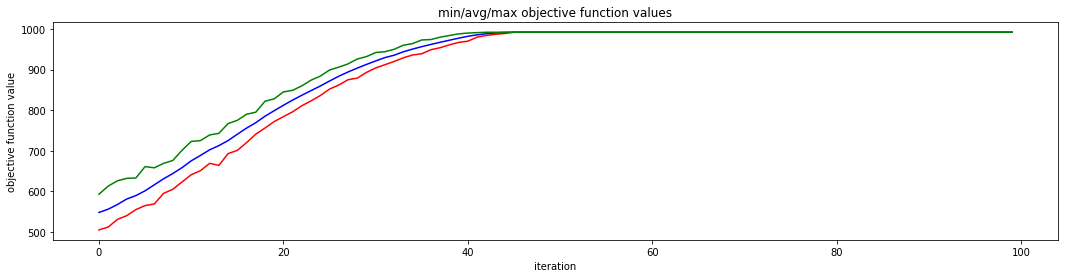

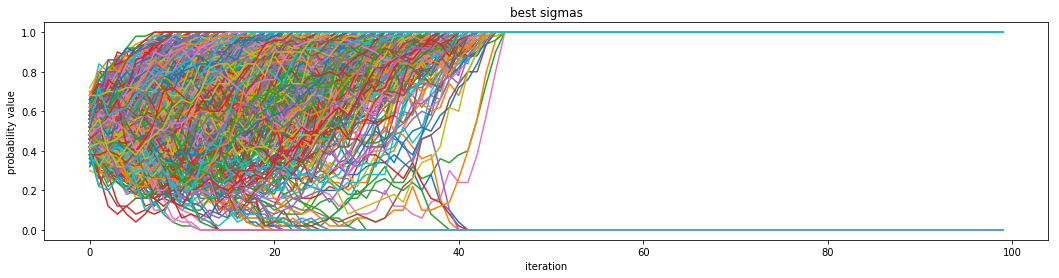

In [21]:
population_history, fitness_history, probability_history = UMDA(100, 1000, 200, 50, deceptive_5_one_max)

plt.figure(figsize=(18, 4))
plt.plot(np.min(fitness_history, axis=1), 'r-')
plt.plot(np.mean(fitness_history, axis=1), 'b-')
plt.plot(np.max(fitness_history, axis=1), 'g-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(probability_history)
plt.xlabel('iteration')
plt.ylabel('probability value')
plt.title('best sigmas')
plt.show()

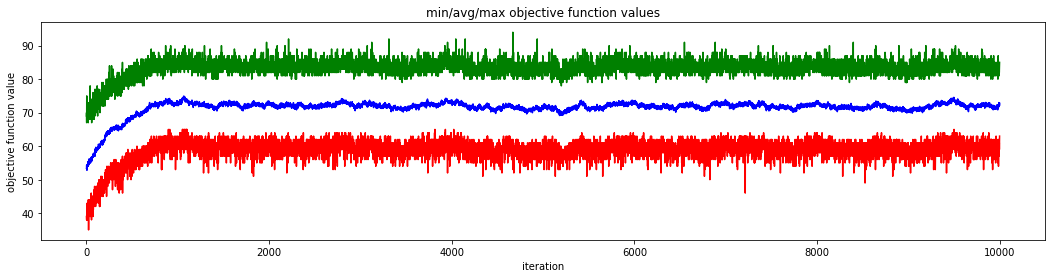

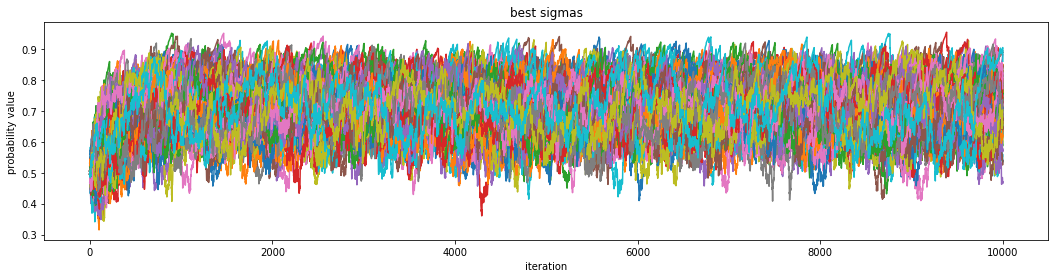

In [31]:
population_history, fitness_history, probability_history = PBIL(10000, 100, 200, deceptive_5_one_max, 0.01, 0.1, 0.05)

plt.figure(figsize=(18, 4))
plt.plot(np.min(fitness_history, axis=1), 'r-')
plt.plot(np.mean(fitness_history, axis=1), 'b-')
plt.plot(np.max(fitness_history, axis=1), 'g-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(probability_history)
plt.xlabel('iteration')
plt.ylabel('probability value')
plt.title('best sigmas')
plt.show()

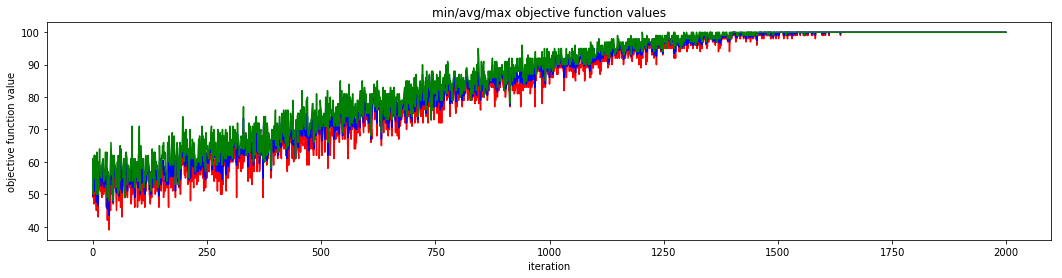

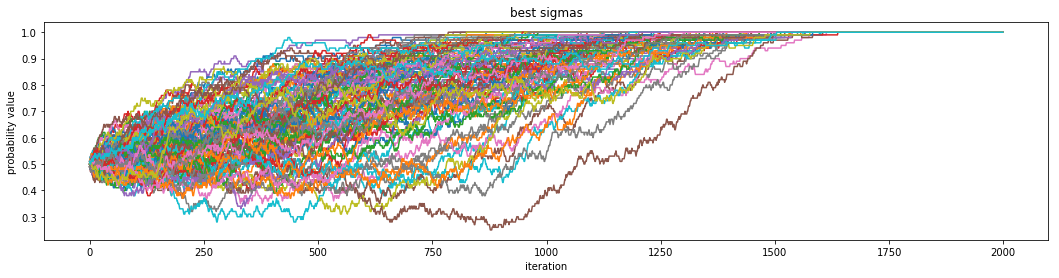

In [16]:
population_history, fitness_history, probability_history = CGA(2000, 100, deceptive_5_one_max, 0.01)

plt.figure(figsize=(18, 4))
plt.plot(np.min(fitness_history, axis=1), 'r-')
plt.plot(np.mean(fitness_history, axis=1), 'b-')
plt.plot(np.max(fitness_history, axis=1), 'g-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(probability_history)
plt.xlabel('iteration')
plt.ylabel('probability value')
plt.title('best sigmas')
plt.show()